# **Predictive Modeling For Car Insurance Claim**

<img src = 'https://hips.hearstapps.com/hmg-prod/images/car-insurance-claim-form-with-toy-and-key-on-table-royalty-free-image-1583581112.jpg?resize=1200:*'>

## *BUSINESS PROBLEM STATEMENT*

##### *Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders*

In [4]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('Data.csv')
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


## Basic Data Exploration

In [6]:
print(f'Total no of rows are {df.shape[0]} and columns are {df.shape[1]}')

Total no of rows are 58592 and columns are 44


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [8]:
print(f'Checking for duplicated values: {df.duplicated().sum()}')

Checking for duplicated values: 0


In [9]:
col_info = pd.DataFrame()

col_info['columns'] = df.dtypes.index.tolist()
col_info['dtypes'] = df.dtypes.values.tolist()
col_info['unique_count'] = df.nunique().tolist()
for col in df.columns:
  col_info['null_count'] = df[col].isnull().sum()

col_info

,columns,dtypes,unique_count,null_count
0,policy_id,object,58592,0
1,policy_tenure,float64,58592,0
2,age_of_car,float64,49,0
3,age_of_policyholder,float64,75,0
4,area_cluster,object,22,0
5,population_density,int64,22,0
6,make,int64,5,0
7,segment,object,6,0
8,model,object,11,0
9,fuel_type,object,3,0


###### No missing/null values present in the data ###

In [10]:
## Statistical Summary

df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [11]:
df.describe(include = 'object')

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592
unique,58592,22,6,11,3,9,9,11,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2
top,ID00001,C8,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,No,Yes,No,Yes,No,Drum,Manual,Power,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,1,13654,18314,14948,20532,17796,17796,14948,40191,35526,44574,56219,35704,44574,38181,33502,33928,41634,41634,38077,32177,42435,42435,57383,34291,36309,42435,58229


## Univariate Analysis

In [12]:
## is_claim

df['is_claim'].unique()

array([0, 1])

In [13]:
claimed = len(df[df['is_claim'] == 1]) / len(df) * 100
print(f'Percentage of Insurance claim: {round(claimed,2)} %')

not_claimed = len(df[df['is_claim'] == 0])/ len(df) * 100
print(f'Percentage of Insurance claim: {round(not_claimed,2)} %')


Percentage of Insurance claim: 6.4 %
Percentage of Insurance claim: 93.6 %


#### Clearly, it is imbalanced dataset

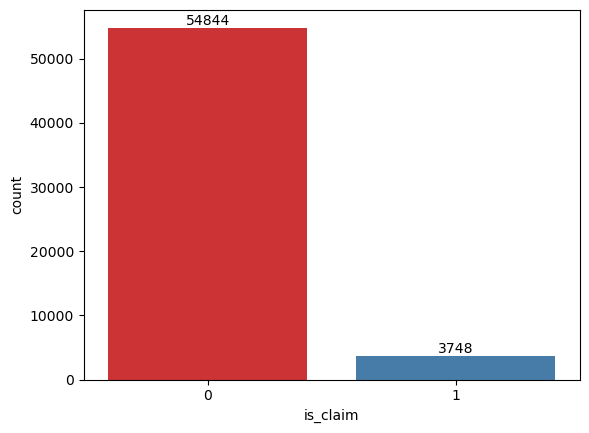

In [14]:
ax=sns.countplot(x = 'is_claim', data = df, palette = 'Set1')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

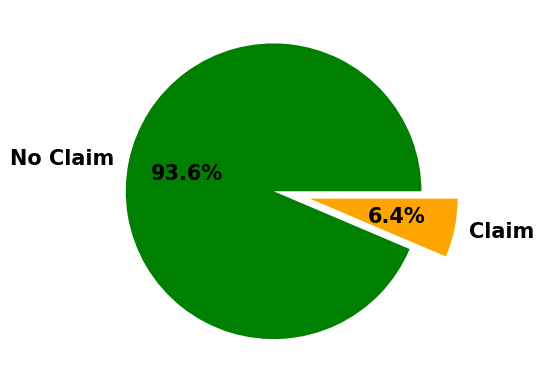

In [15]:
plt.pie(df['is_claim'].value_counts(), labels=['No Claim', 'Claim'], radius=1, colors=['green', 'orange'],
        autopct='%1.1f%%', explode=[0.1, 0.15], textprops={'fontsize': 15, 'fontweight': 'bold'})

plt.show()

In [16]:
col_categorical = df.columns[df.dtypes == 'object']
print(col_categorical)
print("Total categorical columns:", len(col_categorical))

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')
Total categorical columns: 28


In [17]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
print(numerical_columns)
print("Total numerical columns:", len(numerical_columns))

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')
Total numerical columns: 16


In [18]:
for col in col_categorical:
    if df[col].nunique() <15:
        print("-"*20)
        print(col, df[col].unique())

--------------------
segment ['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
--------------------
model ['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'M10' 'M11']
--------------------
fuel_type ['CNG' 'Petrol' 'Diesel']
--------------------
max_torque ['60Nm@3500rpm' '113Nm@4400rpm' '91Nm@4250rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '82.1Nm@3400rpm' '200Nm@1750rpm' '85Nm@3000rpm'
 '170Nm@4000rpm']
--------------------
max_power ['40.36bhp@6000rpm' '88.50bhp@6000rpm' '67.06bhp@5500rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '55.92bhp@5300rpm'
 '97.89bhp@3600rpm' '61.68bhp@6000rpm' '118.36bhp@5500rpm']
--------------------
engine_type ['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'i-DTEC' 'G12B' '1.5 Turbocharged Revotron']
--------------------
is_esc ['No' 'Yes']
--------------------
is_adjustable_steering ['No' 'Yes']
--------------------
is_tpms ['No' 'Yes']
--------------------
is_parking_sensors

In [19]:
for col in numerical_columns:
    if df[col].nunique() <15:
        print("-"*20)
        print(col, df[col].unique())
        
    

--------------------
make [1 2 3 4 5]
--------------------
airbags [2 6 1]
--------------------
displacement [ 796 1197  999 1493 1497  998 1498 1196 1199]
--------------------
cylinder [3 4]
--------------------
gear_box [5 6]
--------------------
turning_radius [4.6  4.8  5.   5.2  4.85 4.7  4.9  4.5  5.1 ]
--------------------
length [3445 3995 3731 4300 3990 3845 3655 3675 3993]
--------------------
width [1515 1735 1579 1790 1755 1745 1620 1695 1475 1811]
--------------------
height [1475 1515 1490 1635 1523 1530 1500 1675 1501 1825 1606]
--------------------
gross_weight [1185 1335 1155 1720 1490 1410 1340 1051 1510 1660]
--------------------
ncap_rating [0 2 3 5 4]
--------------------
is_claim [0 1]


<Axes: >

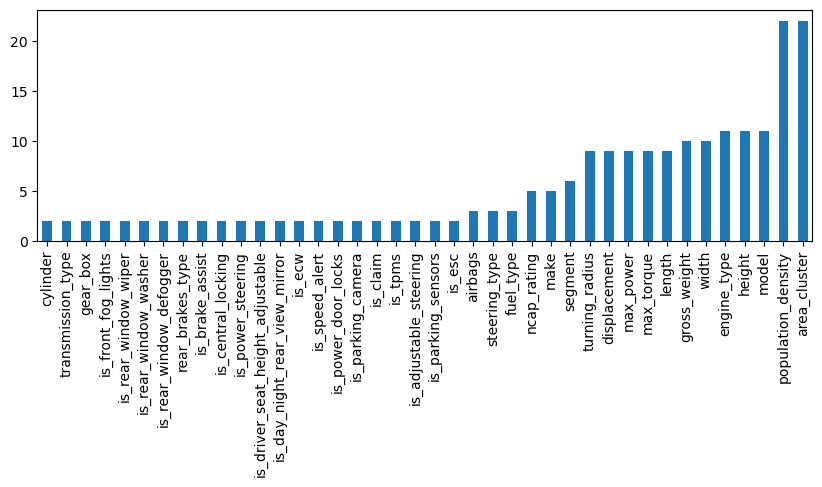

In [20]:
unique_counts = df.nunique().sort_values()[:40]

unique_counts.plot(kind = 'bar', figsize = (10,3) )

### Analysis of each feature

In [21]:
# ### make
# obj_col_list = ['fuel_type', 'rear_brakes_type', 'transmission_type', 'steering_type']

# plt.figure(figsize = (16,16))
# plt.subplots_adjust(hspace = 0.50, wspace = 0.50)

# for i in range(len(obj_col_list)):
#     plt.subplot(3,3,i+1)
#     plt.xticks(rotation=90)
#     sns.countplot(df[obj_col_list[i]], palette = 'Set1')
    
# plt.show()

In [22]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


<Axes: xlabel='model', ylabel='count'>

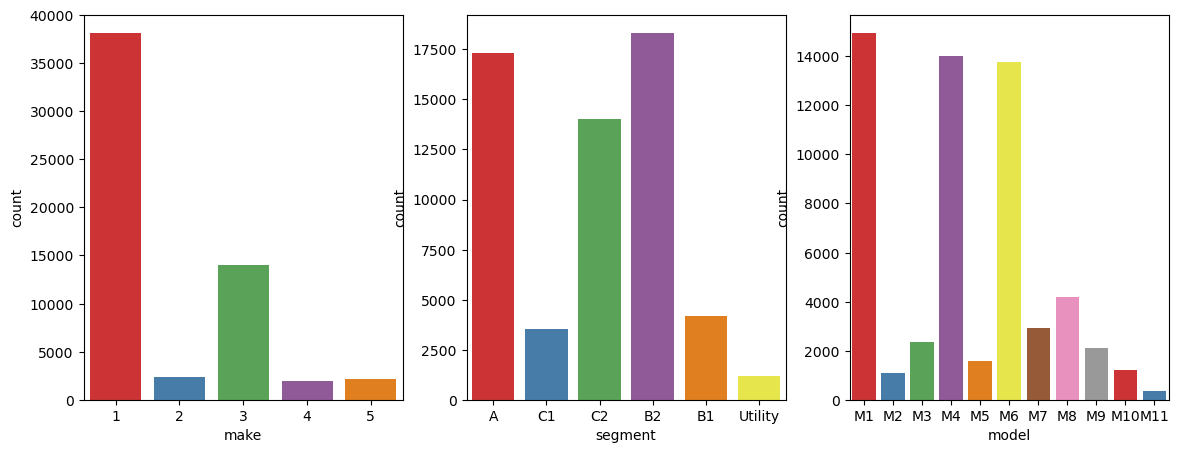

In [23]:
## make 

plt.figure(figsize = (14,5))
plt.subplot(1,3,1)
sns.countplot(x = 'make', data = df, palette = 'Set1')


## segment

plt.subplot(1,3,2)
sns.countplot(x = 'segment', data = df, palette = 'Set1')

## model
plt.subplot(1,3,3)
sns.countplot(x = 'model', data = df, palette = 'Set1')



### Observations :
##### Most of the insured vechiles make/manufature is 1
##### Category to which the most of the insured car belongs to is B2 followed by A and C2
##### Specific model/variant of the most insured car is M1 followed by M4, M5

<Axes: xlabel='steering_type', ylabel='count'>

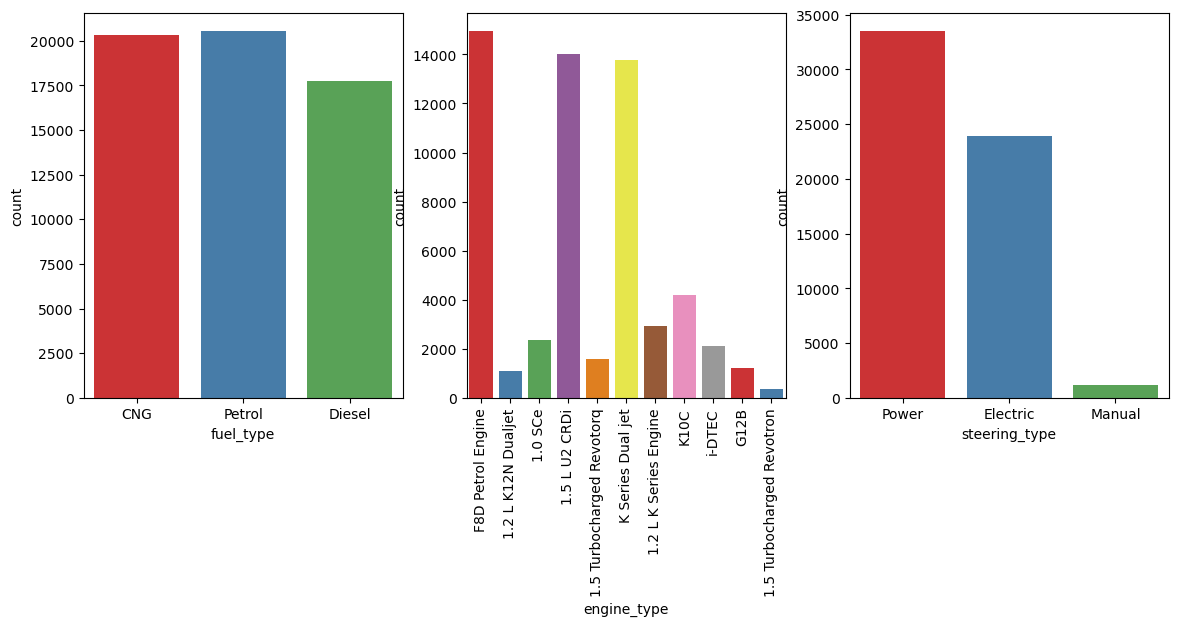

In [24]:

plt.figure(figsize =(14,5))
## fuel type
plt.subplot(1,3,1)
sns.countplot(x = 'fuel_type', data = df, palette = 'Set1')

##engine_type
plt.subplot(1,3,2)
sns.countplot(x = 'engine_type', data = df, palette = 'Set1')
plt.xticks(rotation=90)

##steering_type
plt.subplot(1,3,3)
sns.countplot(x = 'steering_type', data = df, palette = 'Set1')


### Observations :
##### Fuel type for insured cars is Petrol followed by CNG & Diesel
##### Engine type for inured cars is F8D Petrol Engine followed by 1.5L U2 CRDi
##### Steering_type for most of the insured cars is Power followed by Electri and least is Manual. It seems that most of vechiles that are under insurance is automatic cars


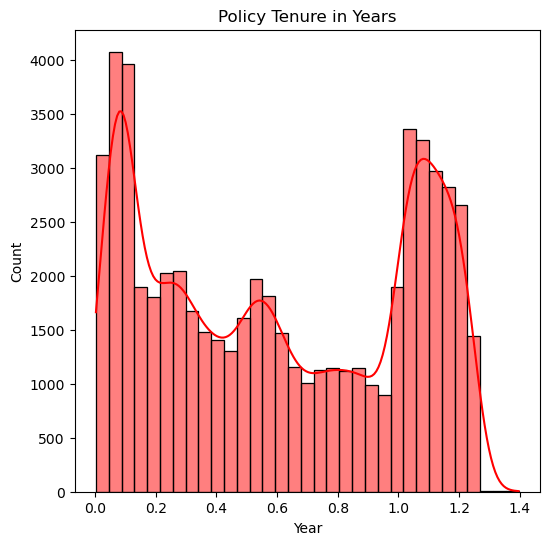

In [25]:
plt.figure(figsize = (6,6))
sns.histplot(data = df, x = 'policy_tenure', kde= True, color='red')
plt.title("Policy Tenure in Years")
plt.xlabel("Year")
plt.show()

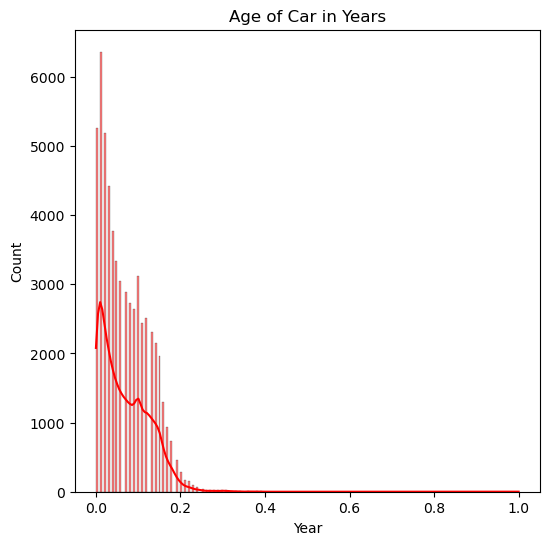

In [26]:
plt.figure(figsize = (6,6))
sns.histplot(data = df, x = 'age_of_car', kde= True, color='red')
plt.title("Age of Car in Years")
plt.xlabel("Year")
plt.show()

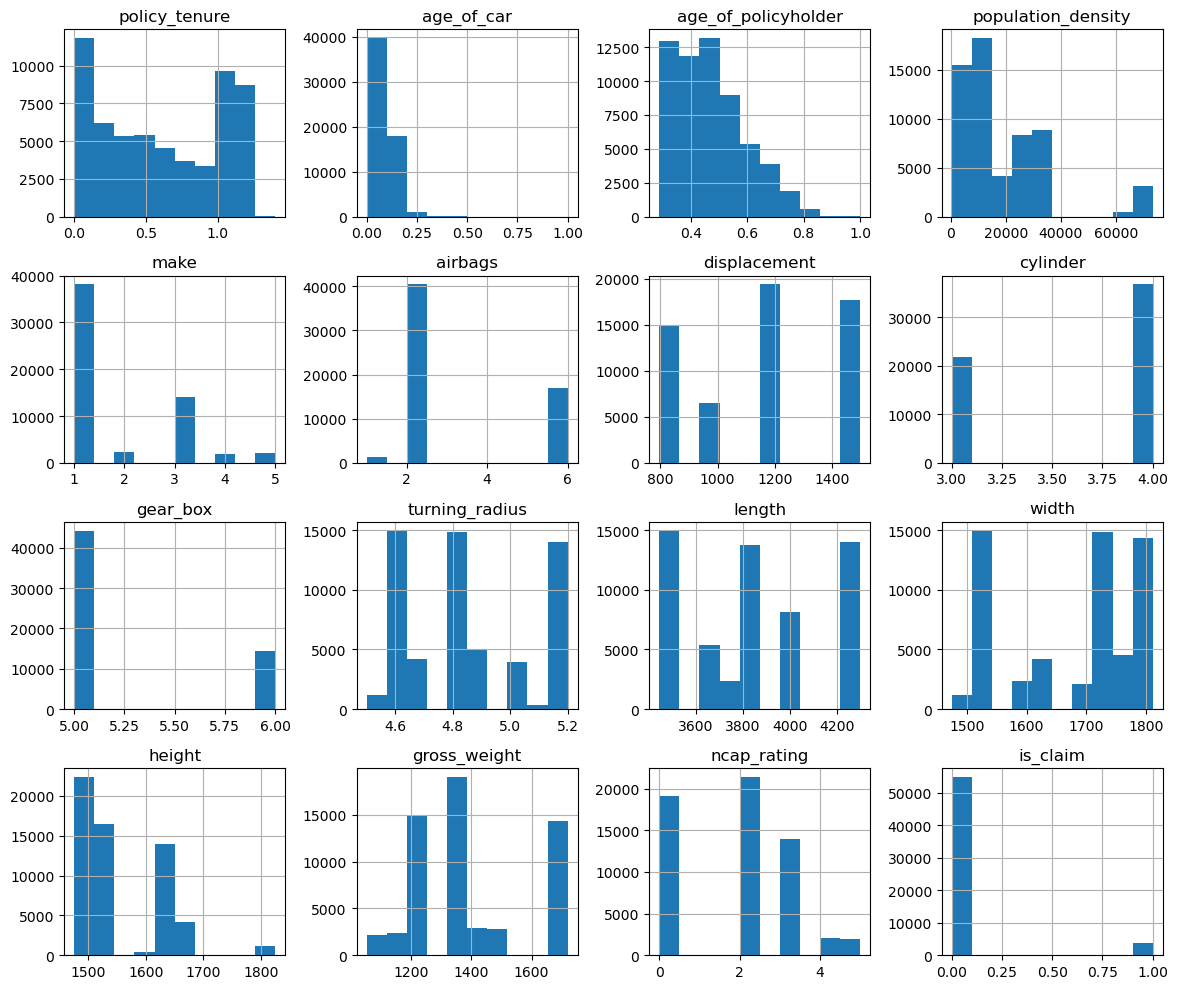

In [27]:
df.hist(figsize=(12, 10))
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

#### Observations:
##### Most people like almost 7000 have had their policy active for 0.1 years
##### Majority of the people opt for insurance immediately when they purchase the car
##### Most of the age of policy holders age is between 0.3 and 0.5
##### Most of the people preffered make-1 cars followed by make-3 & least preferred are 2,4,5
##### Most of the people opt for 2 airbags (40k) followed by 6 airbags(17k) and least with 1 airbag (1200)
##### All the cars are having cylinders either 3 or 4
##### Almost all the cars are having 5-6 gears in the gearbox
##### Most cars have ncap_rating as 2 followed by 0 and very few cars gave 4 (& above) as rating

In [28]:
df['airbags'].value_counts()

airbags
2    40425
6    16958
1     1209
Name: count, dtype: int64

In [29]:
df.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0


In [30]:
claim = df[df['is_claim'] == 1]
no_claim = df[df['is_claim'] == 0]

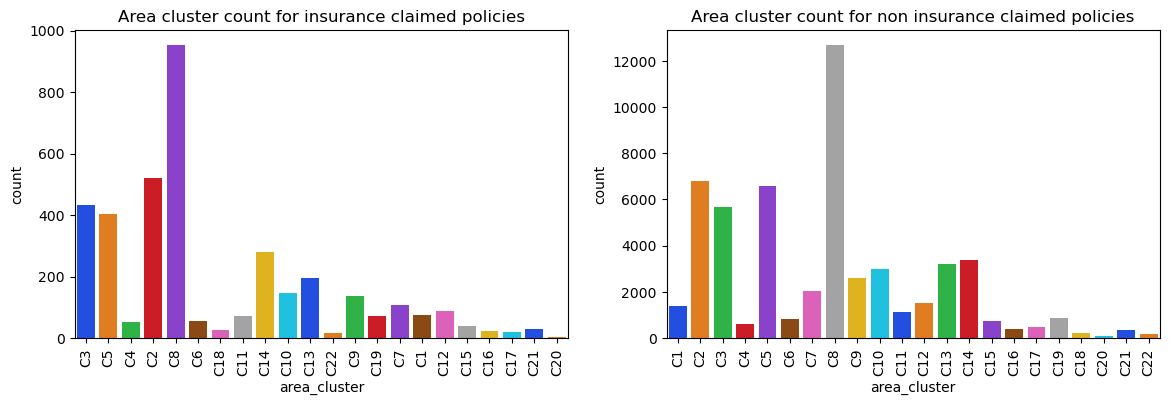

In [31]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.countplot(x = 'area_cluster', data = claim, palette = 'bright')
plt.title("Area cluster count for insurance claimed policies")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = 'area_cluster', data = no_claim, palette = 'bright')
plt.title("Area cluster count for non insurance claimed policies")
plt.xticks(rotation=90)

plt.show()

#### Most of the people (claimed and not claimed) area of residence is C8 category followed by C2, C3 & C5

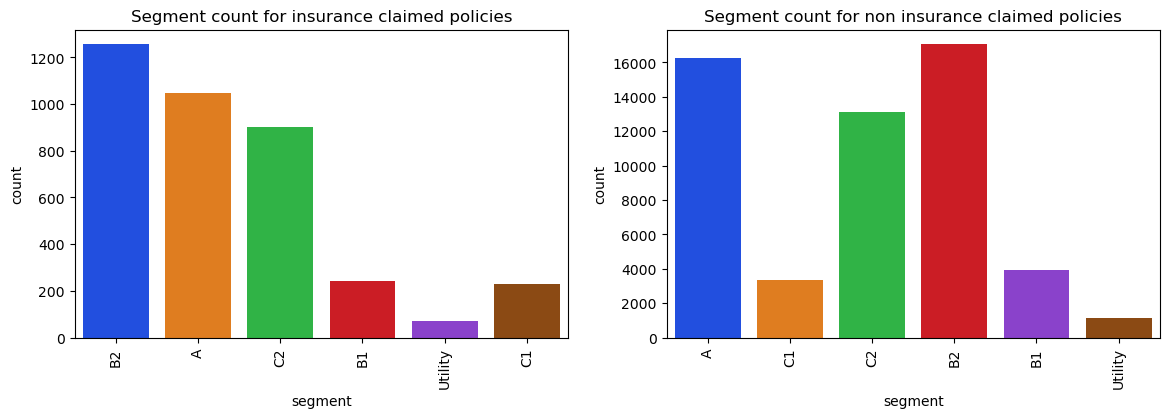

In [32]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.countplot(x = 'segment', data = claim, palette = 'bright')
plt.title("Segment count for insurance claimed policies")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = 'segment', data = no_claim, palette = 'bright')
plt.title("Segment count for non insurance claimed policies")
plt.xticks(rotation=90)

plt.show()

##### We can observe that the car segments with the highest frequencies of insurance claims are B2, followed by A and C2 segments. This suggests that these particular car segments are more prone to incidents or situations where insurance claims are filed.
##### We can observe that among segments, B2 has the highest frequency of cases where insurance claims were not made (non-claimed incidents). A and C2 segments follow in frequency. This could mean that incidents occur in these segments, but they are either not severe enough to warrant an insurance claim or are handled through other means.


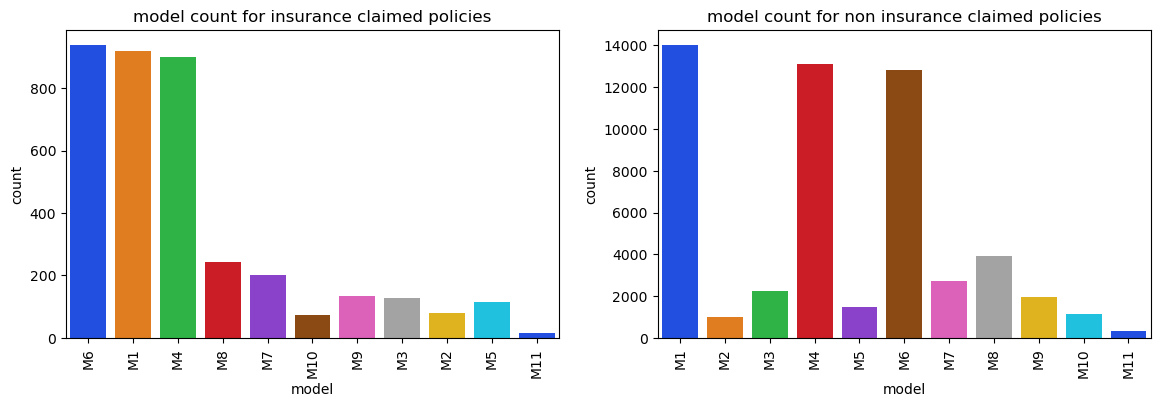

In [33]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.countplot(x = 'model', data = claim, palette = 'bright')
plt.title("model count for insurance claimed policies")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(x = 'model', data = no_claim, palette = 'bright')
plt.title("model count for non insurance claimed policies")
plt.xticks(rotation=90)

plt.show()

##### It seems that, Owners of models M6, M1, and M4 have the highest claims (about 1000 each)

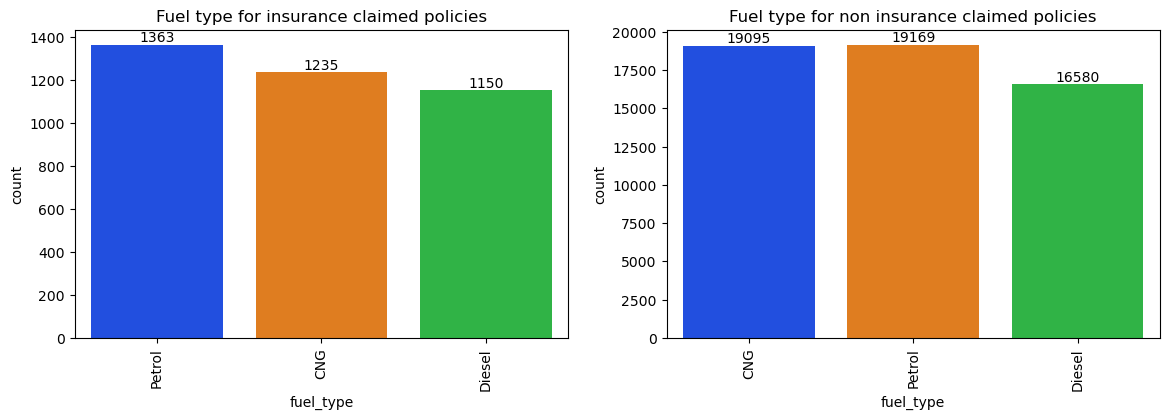

In [34]:
## Fuel Type
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
ax = sns.countplot(x = 'fuel_type', data = claim, palette = 'bright')

for i in ax.containers:
    ax.bar_label(i)
plt.title("Fuel type for insurance claimed policies")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
ax = sns.countplot(x = 'fuel_type', data = no_claim, palette = 'bright')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Fuel type for non insurance claimed policies")
plt.xticks(rotation=90)

plt.show()

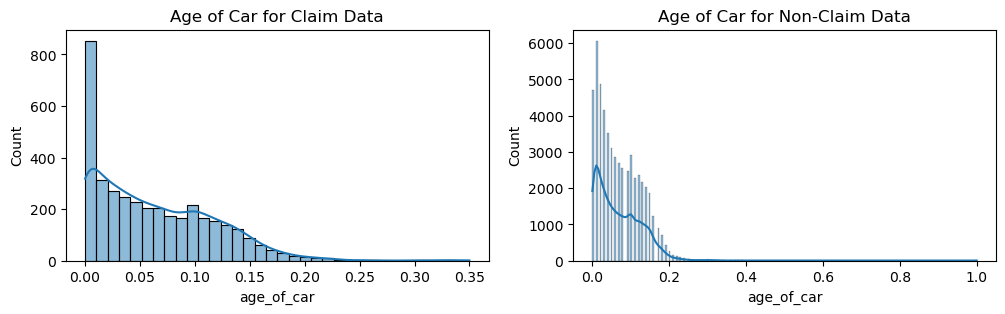

In [35]:
plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
sns.histplot(data=claim, x='age_of_car', kde= True)  
plt.title('Age of Car for Claim Data')

plt.subplot(1, 2, 2)
sns.histplot(data=no_claim, x='age_of_car', kde= True)  
plt.title('Age of Car for Non-Claim Data')
plt.show()

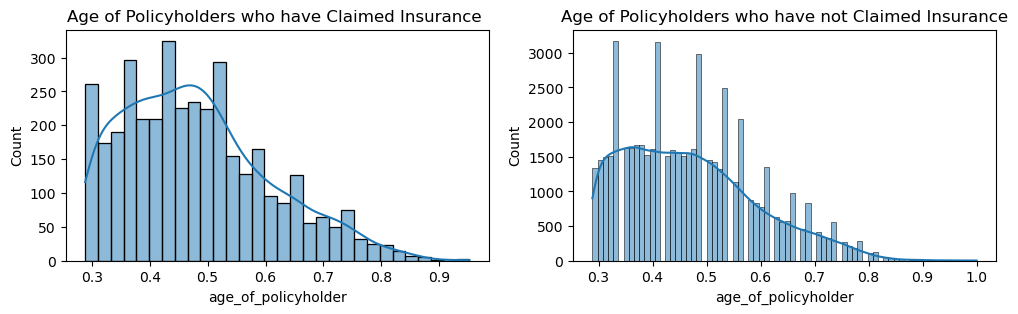

In [36]:
plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
sns.histplot(data=claim, x='age_of_policyholder', kde= True)  
plt.title('Age of Policyholders who have Claimed Insurance ')

plt.subplot(1, 2, 2)
sns.histplot(data=no_claim, x='age_of_policyholder', kde= True)  
plt.title('Age of Policyholders who have not Claimed Insurance')
plt.show()

In [37]:
# sns.countplot(data = df, x = 'is_speed_alert', hue = 'is_claim')
# plt.show()

In [38]:
# binary_cols = ['is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger','is_brake_assist',
#                'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 
#                'is_day_night_rear_view_mirror','is_ecw', 'is_speed_alert']


# fig, axes = plt.subplots(4,3, figsize=(30,24))
# axes = axes.flatten()

# for i, column in enumerate(binary_cols):
#     ax = axes[i] 

#     sns.countplot(data = df, x = column, ax = ax, hue = 'is_claim')
#     ax.set_title(f'Countplot for {column}')
    
#     ax.set_ylabel('Count')
#     ax.tick_params(axis='x', rotation=90)

# plt.tight_layout()
# plt.show()


              

In [39]:
df.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0


In [40]:
def dist_plot(df,col, target = 'is_claim'):
    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    sns.boxplot(data = df,x= target, y =col)
    plt.title(f' {col} vs {target}')

    plt.subplot(1,3,2)
    sns.violinplot(data = df,x= target, y =col)
    plt.title(f' {col} vs {target}')

    plt.subplot(1,3,3)
    sns.kdeplot(data = df, hue = target, x=col)
    plt.title(f' {col} vs {target}')

    plt.show()
    

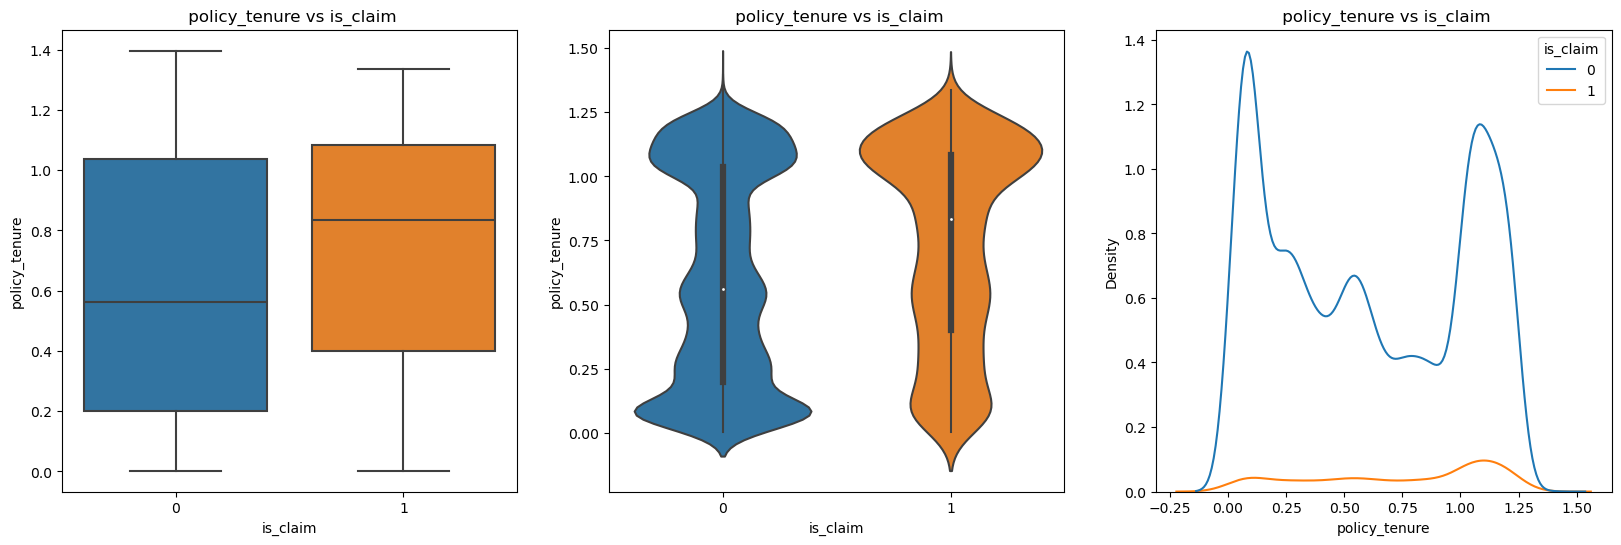

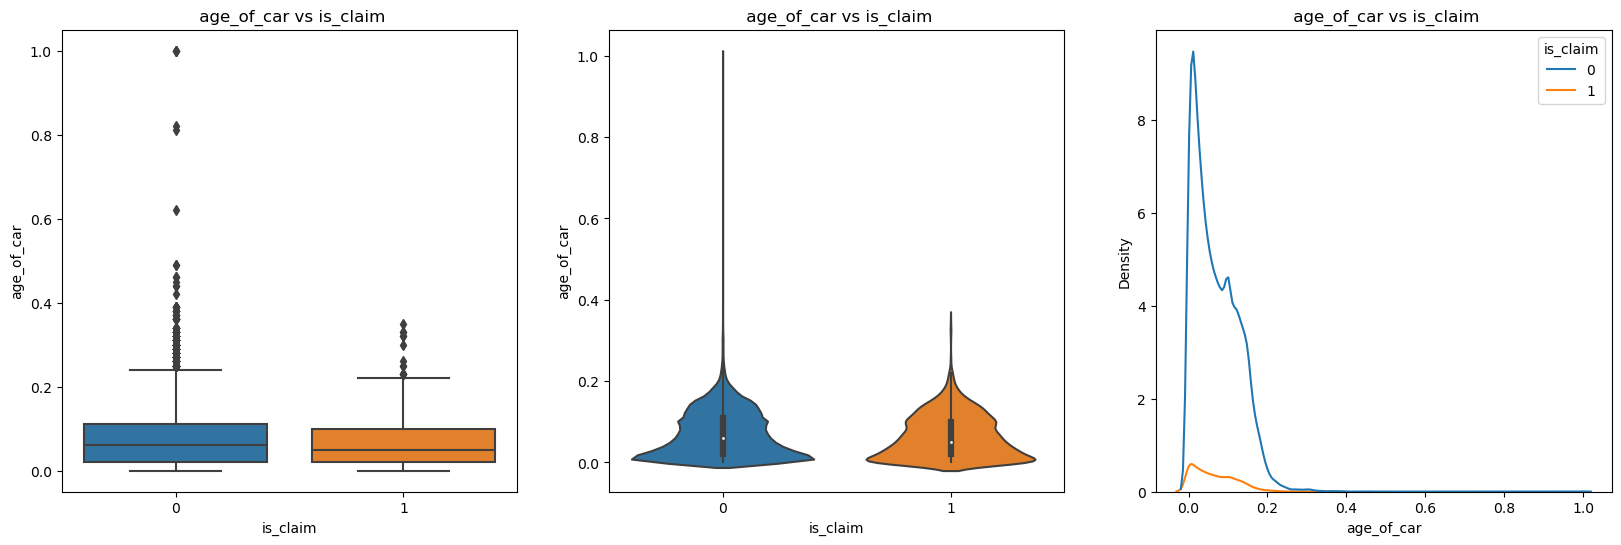

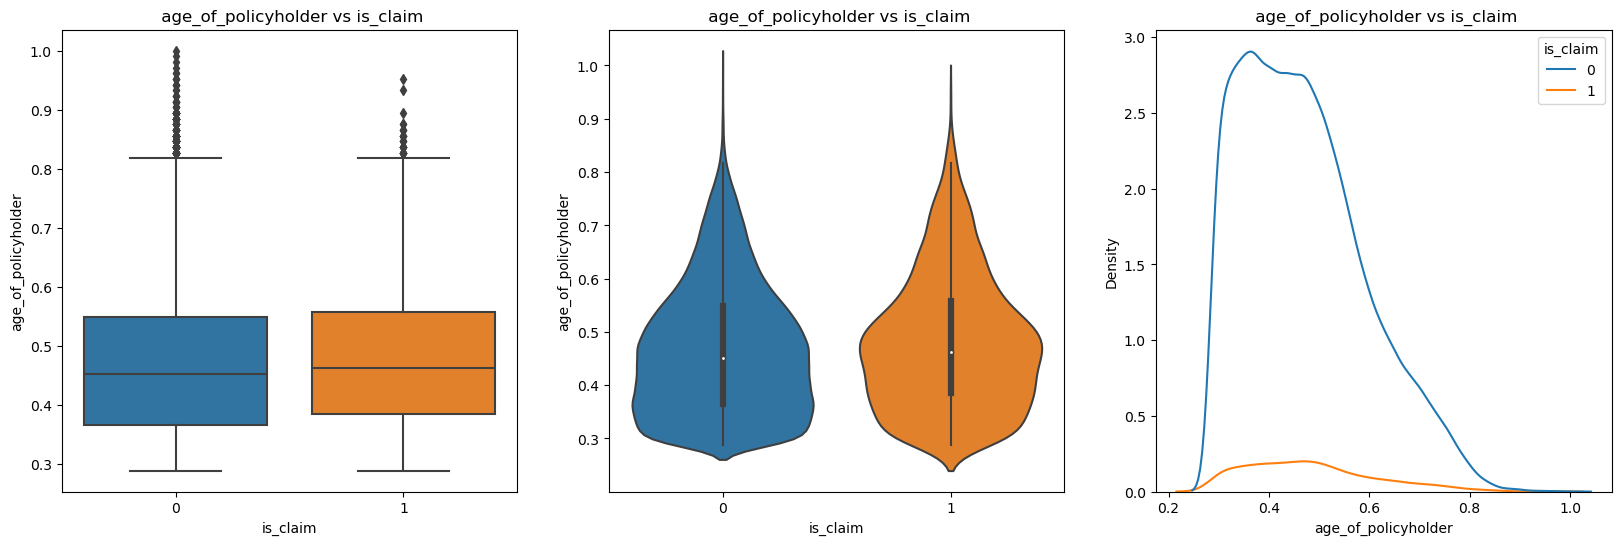

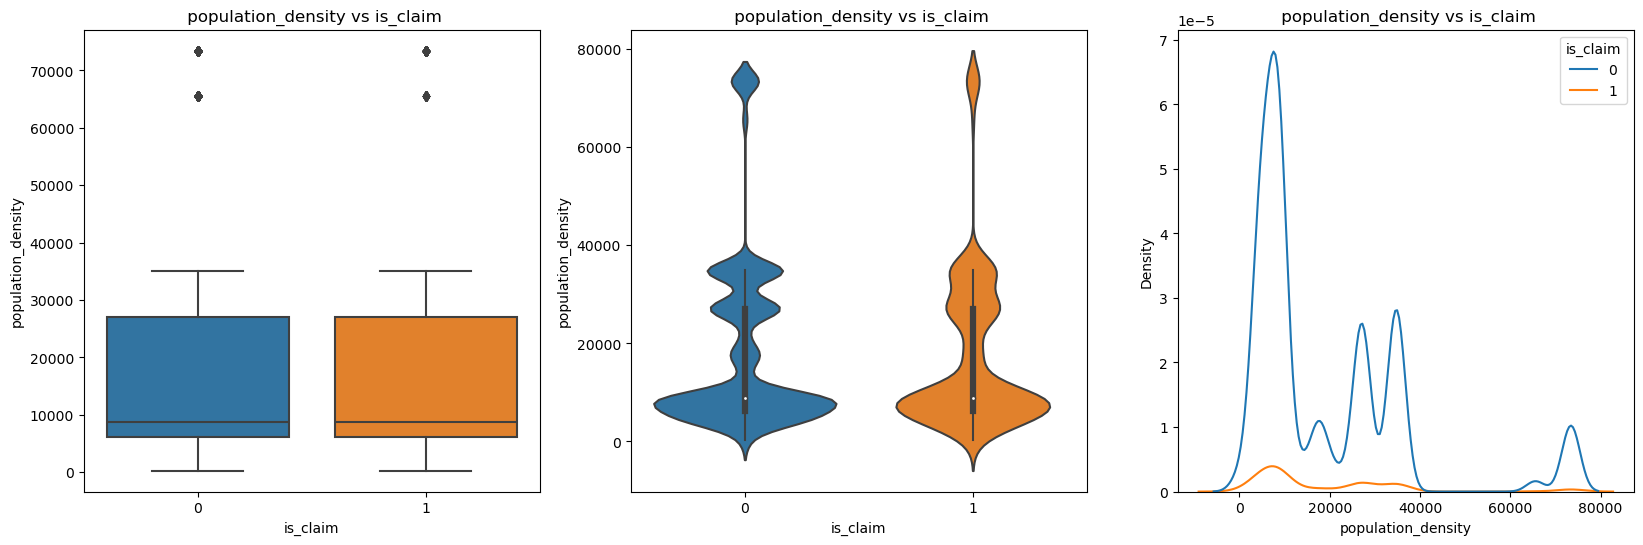

In [41]:
for col in numerical_columns[:-1]:
    if df[col].nunique() > 15:
        dist_plot(df,col)
        

### Bivariate Analysis

In [42]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


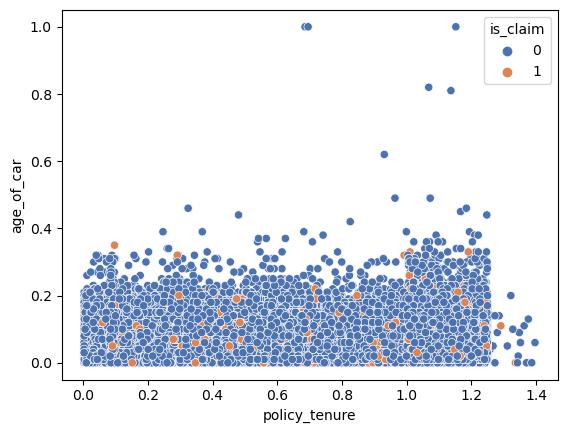

In [43]:
sns.scatterplot(data = df, x='policy_tenure', y='age_of_car', hue = 'is_claim', palette= 'deep')
plt.show()

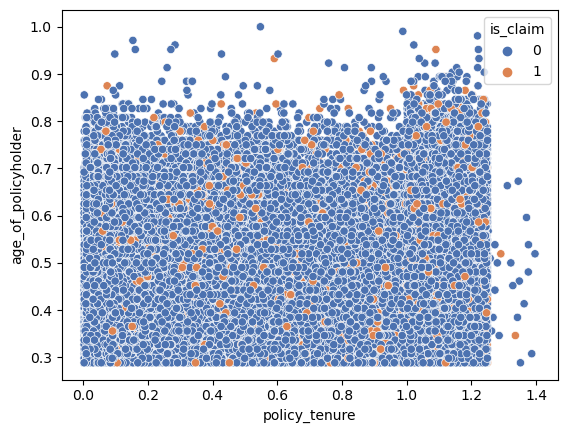

In [44]:
sns.scatterplot(data = df, x='policy_tenure', y='age_of_policyholder', hue = 'is_claim', palette= 'deep')
plt.show()

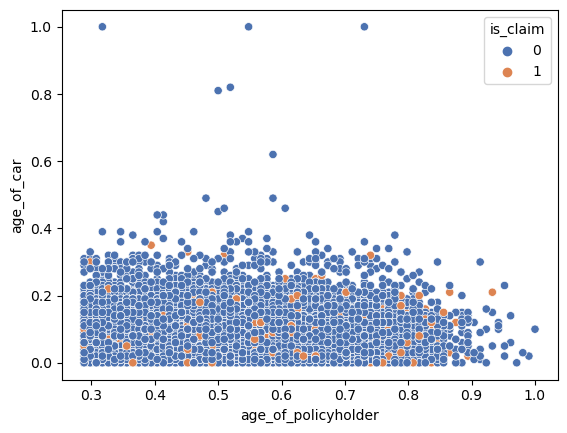

In [45]:
sns.scatterplot(data = df, y='age_of_car', x='age_of_policyholder', hue = 'is_claim', palette= 'deep')
plt.show()

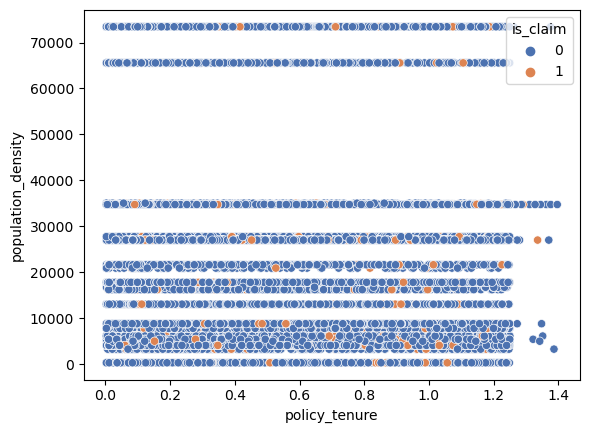

In [46]:
sns.scatterplot(data = df, y='population_density', x='policy_tenure', hue = 'is_claim', palette= 'deep')
plt.show()

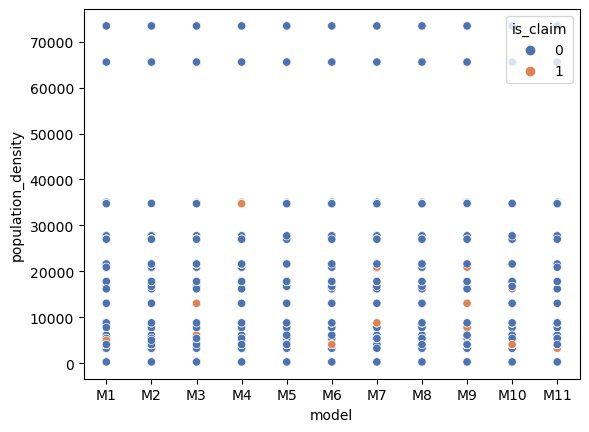

In [47]:
sns.scatterplot(data = df, y='population_density', x='model', hue = 'is_claim', palette= 'deep')
plt.show()

In [48]:
df.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0


In [49]:
## Extracting all the Binary columns to convert them into numuerical features

is_cols_list = [col for col in df.columns if col.startswith("is") and col != 'is_claim']
print(is_cols_list)

['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [50]:
df = df.replace({'No': 0, 'Yes': 1})

In [51]:
num_cols = df.select_dtypes(include = ['int', 'float'])
print("num_cols:" ,num_cols.shape[1])
num_cols.columns

num_cols: 33


Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [52]:
## Categorical columns
cat_cols = df.select_dtypes(include = 'object')
print("Categorical Columns:", cat_cols.shape[1])
cat_cols.columns

Categorical Columns: 11


Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type'],
      dtype='object')

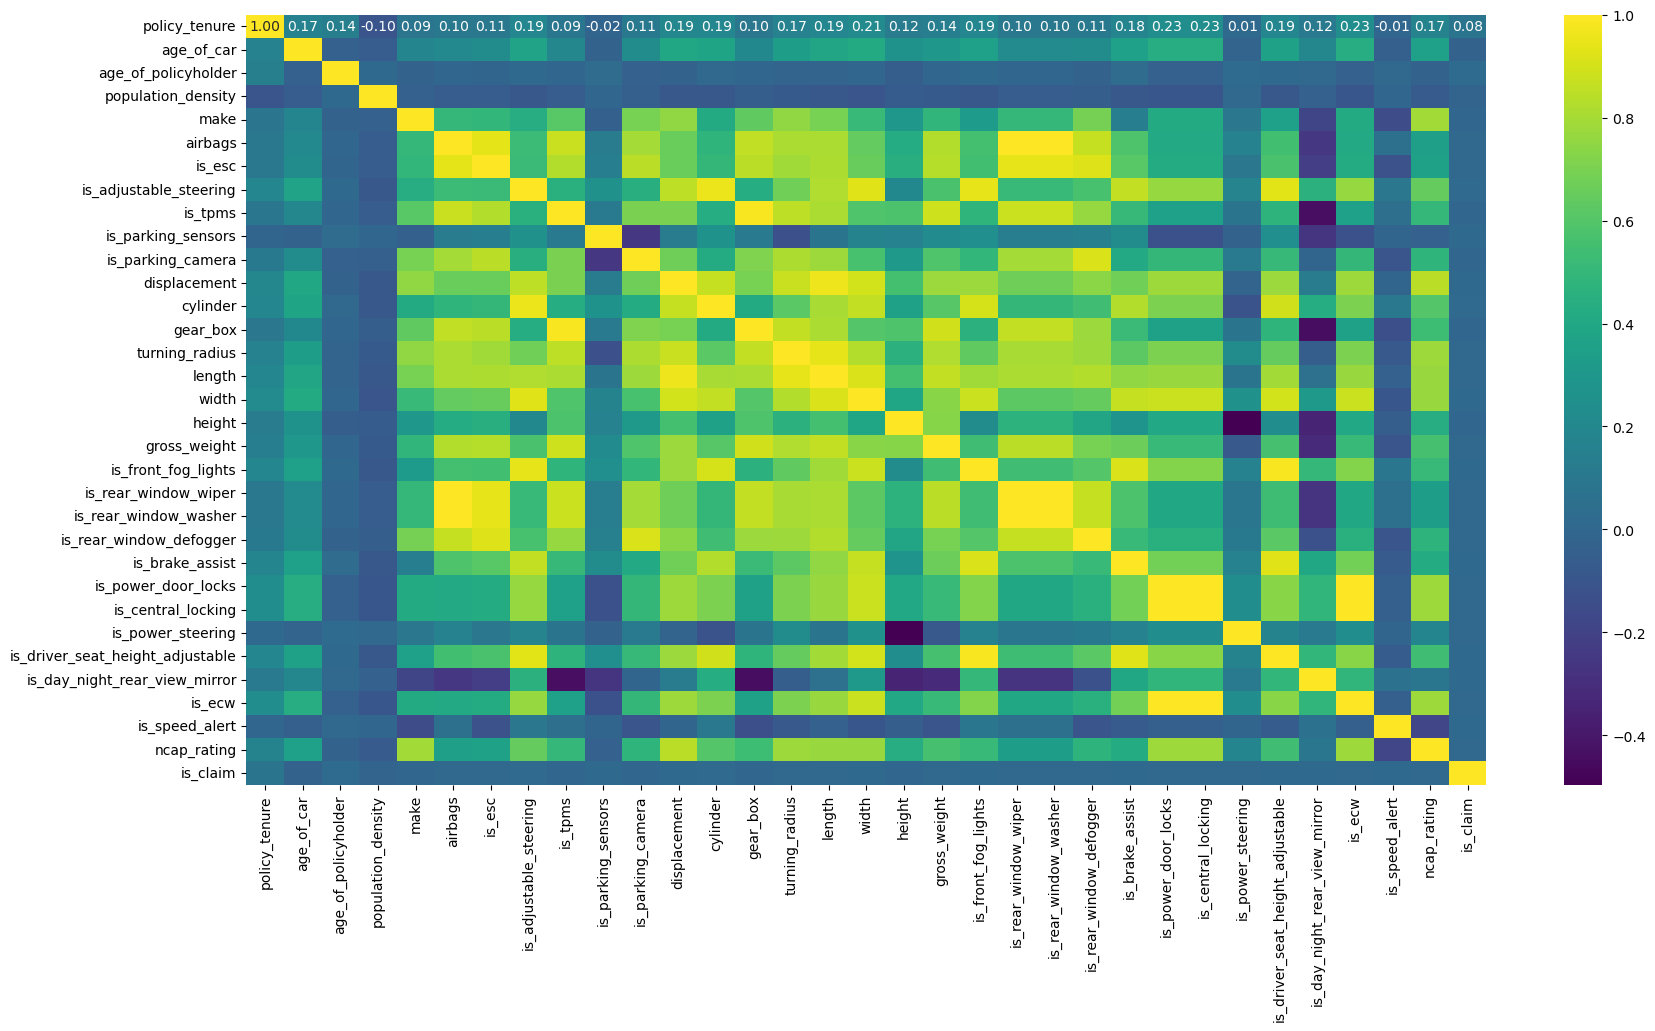

In [53]:
plt.figure(figsize=(20,10))
corr_matrix=num_cols.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="viridis")
plt.show()

## Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  int64  
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  int64  
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  int64  
 8   model                             58592 non-null  int64  
 9   fuel_type                         58592 non-null  int64  
 10  max_torque                        58592 non-null  int64  
 11  max_power                         58592 non-null  int64  
 12  engi

In [56]:
df.head(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0,0.515874,0.05,0.644231,0,4990,1,0,0,0,5,2,6,2,0,0,0,1,0,1,796,3,1,5,2,4.60,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1,0.672619,0.02,0.375000,11,27003,1,0,0,0,5,2,6,2,0,0,0,1,0,1,796,3,1,5,2,4.60,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,2,0.841110,0.02,0.384615,15,4076,1,0,0,0,5,2,6,2,0,0,0,1,0,1,796,3,1,5,2,4.60,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,3,0.900277,0.11,0.432692,16,21622,1,3,3,2,0,6,2,2,1,1,0,1,1,1,1197,4,0,5,0,4.80,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0
4,4,0.596403,0.11,0.634615,17,34738,2,0,4,2,8,5,0,2,0,0,0,0,1,1,999,3,0,5,0,5.00,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0
5,5,1.018709,0.07,0.519231,18,13051,3,4,5,1,4,0,3,6,1,1,1,1,1,0,1493,4,0,6,2,5.20,4300,1790,1635,1720,1,1,1,1,1,1,1,1,1,0,1,1,3,0
6,6,0.097992,0.16,0.403846,19,6112,4,2,6,1,3,7,4,2,0,1,0,1,0,1,1497,4,1,5,0,5.00,3990,1755,1523,1490,0,0,0,0,0,1,1,1,0,0,1,1,5,0
7,7,0.509085,0.14,0.423077,20,8794,1,2,7,2,0,6,8,2,0,1,0,1,0,1,1197,4,1,5,0,4.80,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,0
8,8,0.282394,0.07,0.298077,19,6112,3,4,5,1,4,0,3,6,1,1,1,1,1,0,1493,4,0,6,2,5.20,4300,1790,1635,1720,1,1,1,1,1,1,1,1,1,0,1,1,3,0
9,9,0.566255,0.04,0.442308,21,17804,1,2,8,2,0,6,1,6,1,1,0,1,1,1,1197,4,0,5,0,4.85,3990,1745,1500,1410,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [57]:
final_df= df.copy()

### Top 10 correlated features

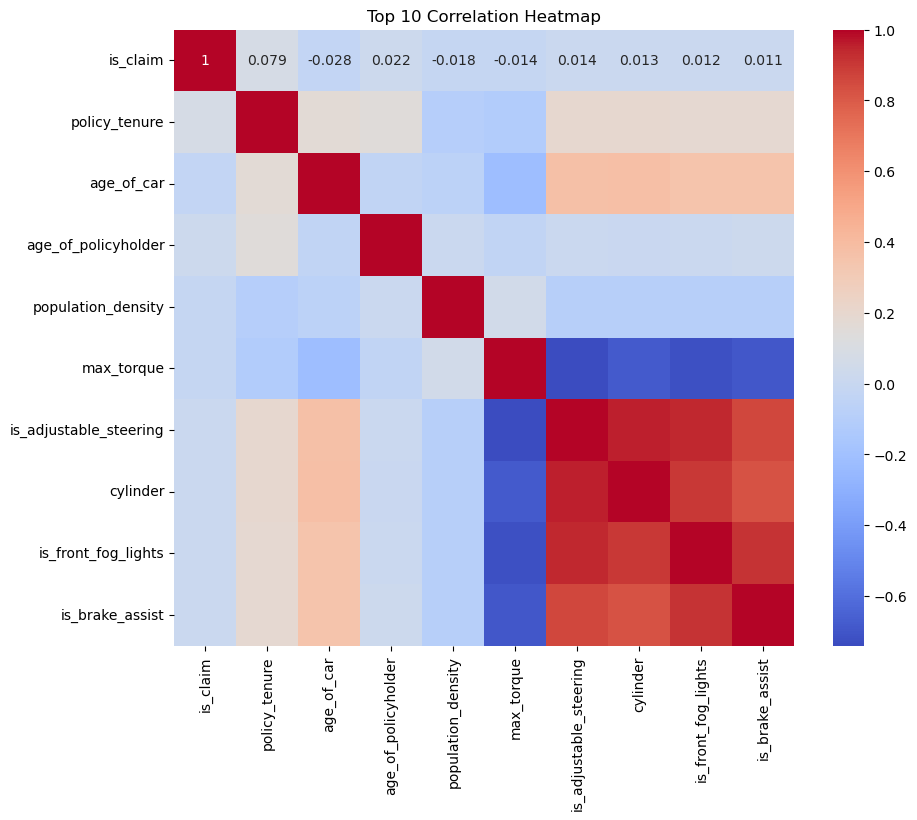

,is_claim,policy_tenure,age_of_car,age_of_policyholder,population_density,max_torque,is_adjustable_steering,cylinder,is_front_fog_lights,is_brake_assist
is_claim,1.000000,0.078747,-0.028172,0.022435,-0.017808,-0.014390,0.013917,0.013434,0.011825,0.010893
policy_tenure,0.078747,1.000000,0.166312,0.143676,-0.100307,-0.121494,0.192941,0.191185,0.189288,0.184687
age_of_car,-0.028172,0.166312,1.000000,-0.035427,-0.062255,-0.218577,0.370190,0.379522,0.349570,0.350568
age_of_policyholder,0.022435,0.143676,-0.035427,1.000000,0.009669,-0.035233,0.011201,0.004183,0.011219,0.025025
population_density,-0.017808,-0.100307,-0.062255,0.009669,1.000000,0.053185,-0.090283,-0.091591,-0.091856,-0.091824
max_torque,-0.014390,-0.121494,-0.218577,-0.035233,0.053185,1.000000,-0.740624,-0.683312,-0.726371,-0.694115
is_adjustable_steering,0.013917,0.192941,0.370190,0.011201,-0.090283,-0.740624,1.000000,0.957287,0.945062,0.863840
cylinder,0.013434,0.191185,0.379522,0.004183,-0.091591,-0.683312,0.957287,1.000000,0.904696,0.825593
is_front_fog_lights,0.011825,0.189288,0.349570,0.011219,-0.091856,-0.726371,0.945062,0.904696,1.000000,0.915803
is_brake_assist,0.010893,0.184687,0.350568,0.025025,-0.091824,-0.694115,0.863840,0.825593,0.915803,1.000000


In [58]:
num_top_features = 10

correlation_values = final_df.corr()['is_claim'].abs().sort_values(ascending=False)[:num_top_features]
top_features = correlation_values.index

subset_df_t = final_df[top_features]
correlation_matrix_top = subset_df_t.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_top, annot=True, cmap="coolwarm")
plt.title(f'Top {num_top_features} Correlation Heatmap')
plt.show()

correlation_matrix_top

### Least correlated features

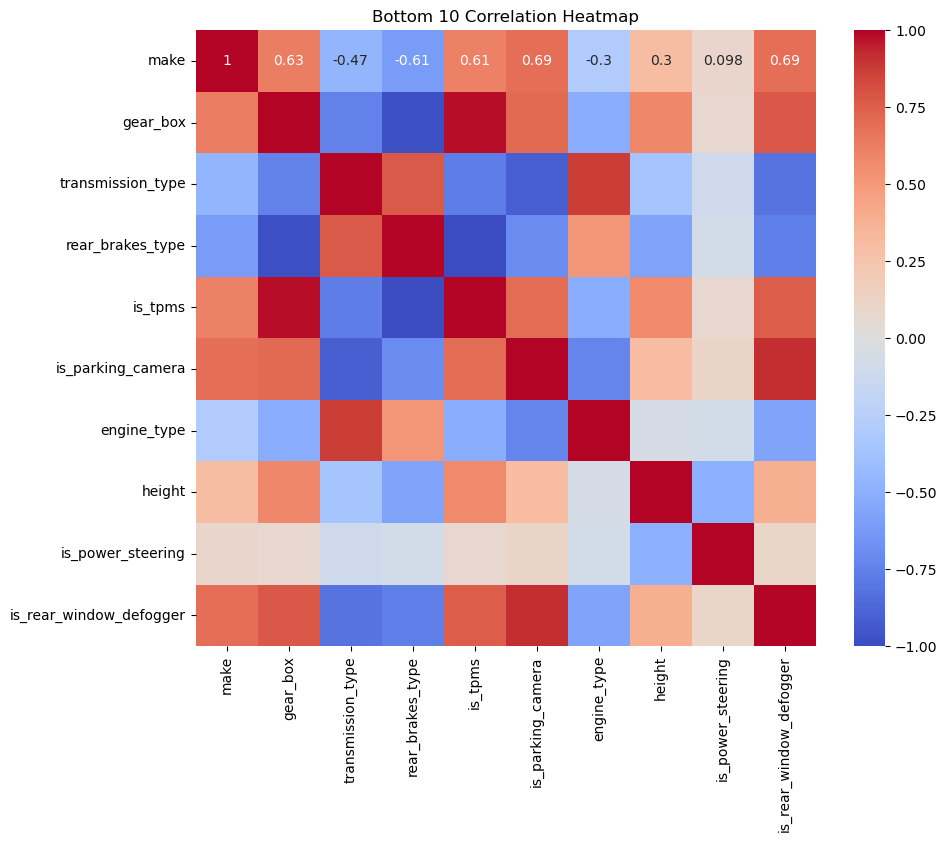

,make,gear_box,transmission_type,rear_brakes_type,is_tpms,is_parking_camera,engine_type,height,is_power_steering,is_rear_window_defogger
make,1.000000,0.632807,-0.466939,-0.609770,0.609770,0.691456,-0.296041,0.303274,0.097500,0.689585
gear_box,0.632807,1.000000,-0.749832,-0.983270,0.983270,0.712334,-0.520942,0.579725,0.082785,0.777007
transmission_type,-0.466939,-0.749832,1.000000,0.766997,-0.766997,-0.913194,0.869431,-0.358240,-0.106128,-0.817900
rear_brakes_type,-0.609770,-0.983270,0.766997,1.000000,-1.000000,-0.700417,0.522771,-0.575182,-0.081400,-0.764008
is_tpms,0.609770,0.983270,-0.766997,-1.000000,1.000000,0.700417,-0.522771,0.575182,0.081400,0.764008
is_parking_camera,0.691456,0.712334,-0.913194,-0.700417,0.700417,1.000000,-0.727544,0.309630,0.116216,0.916767
engine_type,-0.296041,-0.520942,0.869431,0.522771,-0.522771,-0.727544,1.000000,-0.059002,-0.080949,-0.570118
height,0.303274,0.579725,-0.358240,-0.575182,0.575182,0.309630,-0.059002,1.000000,-0.495249,0.384231
is_power_steering,0.097500,0.082785,-0.106128,-0.081400,0.081400,0.116216,-0.080949,-0.495249,1.000000,0.106543
is_rear_window_defogger,0.689585,0.777007,-0.817900,-0.764008,0.764008,0.916767,-0.570118,0.384231,0.106543,1.000000


In [59]:
num_bottom_features = 10

correlation_values = final_df.corr()['is_claim'].abs().sort_values(ascending=True)[:num_bottom_features]
bottom_features = correlation_values.index

subset_df_b = final_df[bottom_features]
correlation_matrix_b = subset_df_b.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_b, annot=True, cmap="coolwarm")
plt.title(f'Bottom {num_bottom_features} Correlation Heatmap')
plt.show()

correlation_matrix_b

In [60]:
print("Top correlated features are:", correlation_matrix_top.columns)
print("="*120)
print("Bottom correlated features are:", correlation_matrix_b.columns)

Top correlated features are: Index(['is_claim', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'max_torque', 'is_adjustable_steering',
       'cylinder', 'is_front_fog_lights', 'is_brake_assist'],
      dtype='object')
Bottom correlated features are: Index(['make', 'gear_box', 'transmission_type', 'rear_brakes_type', 'is_tpms',
       'is_parking_camera', 'engine_type', 'height', 'is_power_steering',
       'is_rear_window_defogger'],
      dtype='object')


### Seperating independent (x) & dependent (y) features

In [61]:
x = final_df.drop(columns = ['policy_id', 'is_claim'], axis = 1)
y= final_df['is_claim']

## Imbalanace Treatment (Using imblearn)

In [62]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_ov, y_ov = smote.fit_resample(x,y)

is_claim
0    54844
1     3748
Name: count, dtype: int64 
 is_claim
0    54844
1    54844
Name: count, dtype: int64


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

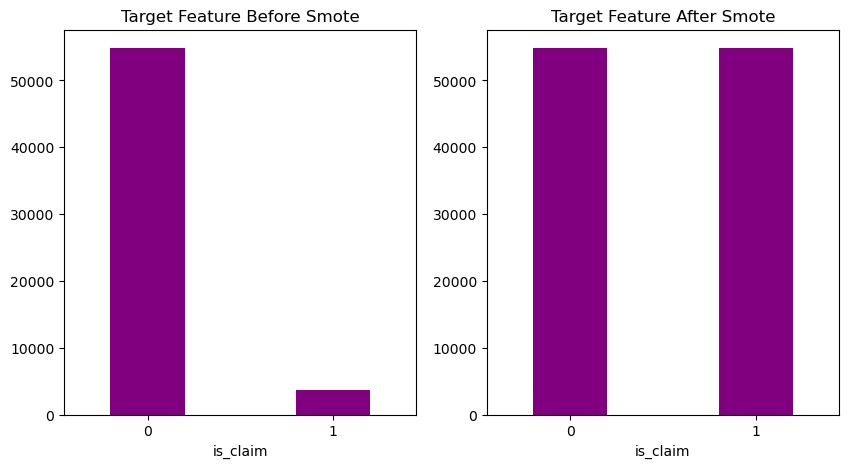

In [63]:
print(y.value_counts(), '\n', y_ov.value_counts())
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
y.value_counts().plot(kind = 'bar', width = 0.4, color = 'purple')
plt.title("Target Feature Before Smote")
plt.xticks(rotation=360)
plt.subplot(1,2,2)
y_ov.value_counts().plot(kind = 'bar',width = 0.4,  color = 'purple')
plt.title("Target Feature After Smote")
plt.xticks(rotation=360)


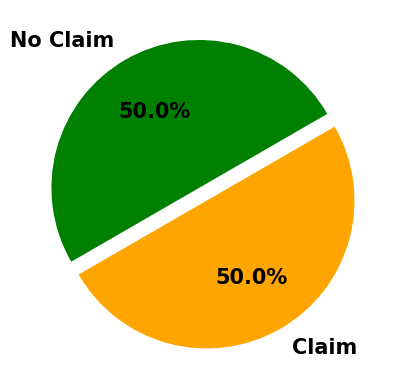

In [64]:
plt.pie(y_ov.value_counts(), labels=['No Claim', 'Claim'], radius=1, colors=['green', 'orange'],
        autopct='%1.1f%%', explode=[0.05, 0.05], labeldistance=1.15, startangle=30,
        textprops={'fontsize': 15, 'fontweight': 'bold'})

plt.show()

### Train - Test Split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_ov,y_ov, test_size = 0.2, random_state = 42, stratify = y_ov)

### Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Building Model

In [68]:
import xgboost as xgb

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import *

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [69]:
lr = LogisticRegression()
Knn = KNeighborsClassifier()
svc = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()
GB = GradientBoostingClassifier()
ADB = AdaBoostClassifier()
XGB = XGBClassifier()
NB = GaussianNB()

In [70]:
models=[('Logistic Regression', lr),('KNeighborsClassifier', Knn),('SVC', svc),('Decision Tree', DT),
        ('Random Forest', RFC),('Gradient Boosting', GB),('AdaBoost', ADB),('XGBoost',XGB),('Naive Bayes', NB)] 

In [71]:
# for model_name, model in models:
#     model.fit(x_train, y_train)
#     y_pred_train = model.predict(x_train)
#     y_pred_test = model.predict(x_test)
#     print("="*40)
#     print("Model Name:", model_name)
#     print("="*40)
#     print("Training Accuracy score:", accuracy_score(y_train, y_pred_train))
#     print("Testing Accuracy score:", accuracy_score(y_test, y_pred_test))
#     # cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
#     # print(cm)
#     #print(confusion_matrix(y_test, y_pred_test))
#     print(classification_report(y_test, y_pred_test))

In [72]:
# a={'Model Name':[], 'Training Accuracy Score':[] ,'Testing Accuracy Score':[] ,'Precision Score':[] ,'Recall Score':[] ,'Accuracy Score':[] ,'F1 Score':[]}
# Results=pd.DataFrame(a)
# Results.head()

In [73]:
# for model_name, model in models:
#     model.fit(x_train, y_train)
#     y_pred_train = model.predict(x_train)
#     y_pred_test = model.predict(x_test)
#     new_row = {'Model Name': model_name, 
#                'Training Accuracy Score' : model.predict(x_train),
#                'Testing Accuracy Score' : model.predict(x_test),
#                'Precision Score' : precision_score(y_test, y_pred_test),
#                'Recall Score' : recall_score(y_test, y_pred_test),
#                'Accuracy Score' : accuracy_score(y_test, y_pred_test),
#                'F1 Score': f1_score(y_test, y_pred_test)}
#     Results = Results.append(new_row, ignore_index=True)


               
    

## *1. Logistic regression*

In [74]:
from sklearn.linear_model import LogisticRegression
# fitting
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# predicting
y_pred = logreg.predict(x_test)
y_pred_train=logreg.predict(x_train)

# results
print('For test data')
print("="*50)
print(classification_report(y_test,y_pred))
print("="*50)
print('For train data')
print("="*50)
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.59      0.59      0.59     10969
           1       0.59      0.60      0.59     10969

    accuracy                           0.59     21938
   macro avg       0.59      0.59      0.59     21938
weighted avg       0.59      0.59      0.59     21938

For train data
              precision    recall  f1-score   support

           0       0.59      0.58      0.59     43875
           1       0.59      0.59      0.59     43875

    accuracy                           0.59     87750
   macro avg       0.59      0.59      0.59     87750
weighted avg       0.59      0.59      0.59     87750



## *2. Decision Tree*

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_predd = dt.predict(x_test)
y_predd_train=dt.predict(x_train)


print('For test data')
print("="*50)
print(classification_report(y_test,y_pred))
print("="*50)
print('For train data')
print("="*50)
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.59      0.59      0.59     10969
           1       0.59      0.60      0.59     10969

    accuracy                           0.59     21938
   macro avg       0.59      0.59      0.59     21938
weighted avg       0.59      0.59      0.59     21938

For train data
              precision    recall  f1-score   support

           0       0.59      0.58      0.59     43875
           1       0.59      0.59      0.59     43875

    accuracy                           0.59     87750
   macro avg       0.59      0.59      0.59     87750
weighted avg       0.59      0.59      0.59     87750



## *3. KNN*

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred_train=knn.predict(x_train)

print('For test data')
print("="*50)
print(classification_report(y_test,y_pred))
print("="*50)
print('For train data')
print("="*50)
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.88      0.69      0.77     10969
           1       0.74      0.90      0.81     10969

    accuracy                           0.79     21938
   macro avg       0.81      0.79      0.79     21938
weighted avg       0.81      0.79      0.79     21938

For train data
              precision    recall  f1-score   support

           0       0.93      0.77      0.85     43875
           1       0.81      0.95      0.87     43875

    accuracy                           0.86     87750
   macro avg       0.87      0.86      0.86     87750
weighted avg       0.87      0.86      0.86     87750



## Random Forest


In [77]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=77)
rfc.fit(x_train,y_train)

y_pred = rfc.predict(x_test)
y_pred_train = rfc.predict(x_train)

print('For test data')
print("="*50)
print(classification_report(y_test,y_pred))
print("="*50)
print('For train data')
print("="*50)
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     10969
           1       0.91      0.92      0.92     10969

    accuracy                           0.91     21938
   macro avg       0.91      0.91      0.91     21938
weighted avg       0.91      0.91      0.91     21938

For train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43875
           1       1.00      1.00      1.00     43875

    accuracy                           1.00     87750
   macro avg       1.00      1.00      1.00     87750
weighted avg       1.00      1.00      1.00     87750



## Imp features

In [78]:
f_indx = []
f_name= []
feature_details = {i:v for i,v in enumerate(x.columns)}
print(feature_details)
for i,v in feature_details.items():
    f_indx.append(i)
    f_name.append(v)
feature_names = f_name



{0: 'policy_tenure', 1: 'age_of_car', 2: 'age_of_policyholder', 3: 'area_cluster', 4: 'population_density', 5: 'make', 6: 'segment', 7: 'model', 8: 'fuel_type', 9: 'max_torque', 10: 'max_power', 11: 'engine_type', 12: 'airbags', 13: 'is_esc', 14: 'is_adjustable_steering', 15: 'is_tpms', 16: 'is_parking_sensors', 17: 'is_parking_camera', 18: 'rear_brakes_type', 19: 'displacement', 20: 'cylinder', 21: 'transmission_type', 22: 'gear_box', 23: 'steering_type', 24: 'turning_radius', 25: 'length', 26: 'width', 27: 'height', 28: 'gross_weight', 29: 'is_front_fog_lights', 30: 'is_rear_window_wiper', 31: 'is_rear_window_washer', 32: 'is_rear_window_defogger', 33: 'is_brake_assist', 34: 'is_power_door_locks', 35: 'is_central_locking', 36: 'is_power_steering', 37: 'is_driver_seat_height_adjustable', 38: 'is_day_night_rear_view_mirror', 39: 'is_ecw', 40: 'is_speed_alert', 41: 'ncap_rating'}


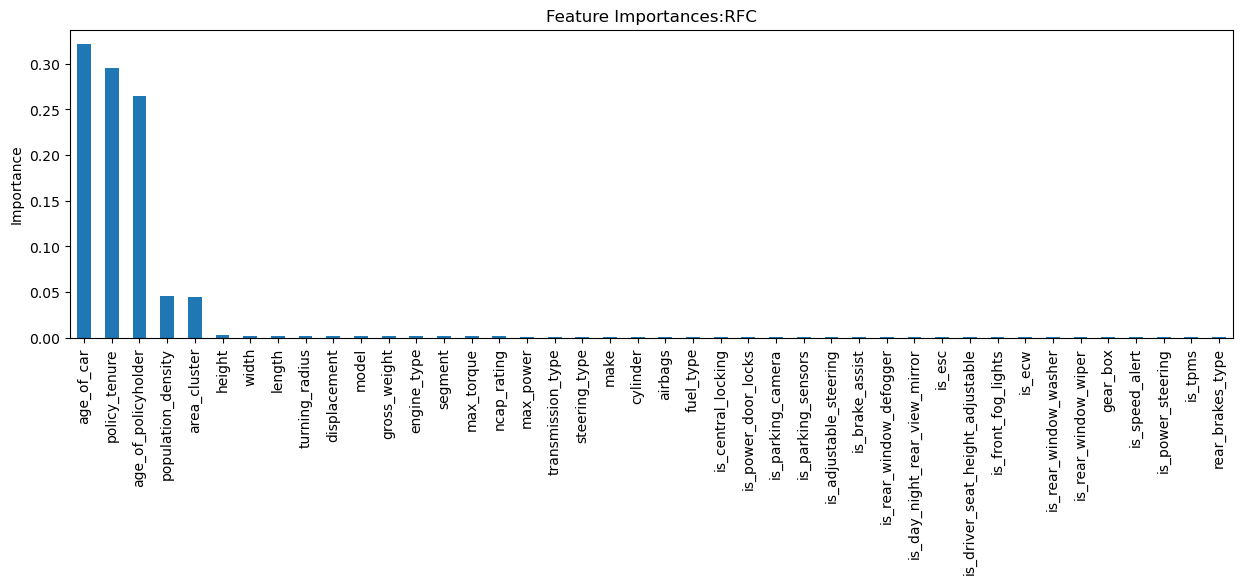

In [79]:

feature_scores = pd.Series(rfc.feature_importances_, index=feature_names).sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(15,4))
feature_scores.sort_values(ascending=False).plot(kind='bar', ax=ax)
plt.title("Feature Importances:RFC")
plt.ylabel("Importance")
plt.show()

## *5. SVM*

## *6. Gradient Boosting*

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

gdb = GradientBoostingClassifier()
gdb.fit(x_train,y_train)

y_pred = gdb.predict(x_test)
y_pred_train = gdb.predict(x_train)


print('For test data')
print("="*50)
print(classification_report(y_test,y_pred))
print("="*50)
print('For train data')
print("="*50)
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     10969
           1       0.94      0.86      0.90     10969

    accuracy                           0.90     21938
   macro avg       0.91      0.90      0.90     21938
weighted avg       0.91      0.90      0.90     21938

For train data
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     43875
           1       0.95      0.86      0.90     43875

    accuracy                           0.90     87750
   macro avg       0.91      0.90      0.90     87750
weighted avg       0.91      0.90      0.90     87750



## *7. AdaBoost*

In [81]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)

y_pred = adb.predict(x_test)
y_pred_train = adb.predict(x_train)


print('For test data')
print("="*50)
print(classification_report(y_test,y_pred))
print("="*50)
print('For train data')
print("="*50)
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.74      0.66      0.70     10969
           1       0.69      0.76      0.73     10969

    accuracy                           0.71     21938
   macro avg       0.72      0.71      0.71     21938
weighted avg       0.72      0.71      0.71     21938

For train data
              precision    recall  f1-score   support

           0       0.74      0.66      0.70     43875
           1       0.70      0.77      0.73     43875

    accuracy                           0.72     87750
   macro avg       0.72      0.72      0.71     87750
weighted avg       0.72      0.72      0.71     87750



## *8. Ridge Classifier*

In [82]:
from sklearn.linear_model import RidgeClassifier

rc = RidgeClassifier()
rc.fit(x_train,y_train)

y_pred = rc.predict(x_test)
y_pred_train = rc.predict(x_train)


print('For test data')
print("="*50)
print(classification_report(y_test,y_pred))
print("="*50)
print('For train data')
print("="*50)
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.59      0.58      0.59     10969
           1       0.59      0.60      0.59     10969

    accuracy                           0.59     21938
   macro avg       0.59      0.59      0.59     21938
weighted avg       0.59      0.59      0.59     21938

For train data
              precision    recall  f1-score   support

           0       0.59      0.58      0.58     43875
           1       0.59      0.60      0.59     43875

    accuracy                           0.59     87750
   macro avg       0.59      0.59      0.59     87750
weighted avg       0.59      0.59      0.59     87750



## *9. XGBoost*

In [83]:
from xgboost import XGBClassifier

xgb= XGBClassifier()
xgb.fit(x_train,y_train)

y_pred = xgb.predict(x_test)
y_pred_train = xgb.predict(x_train)


print('For test data')
print("="*50)
print(classification_report(y_test,y_pred))
print("="*50)
print('For train data')
print("="*50)
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     10969
           1       0.99      0.88      0.93     10969

    accuracy                           0.94     21938
   macro avg       0.94      0.94      0.93     21938
weighted avg       0.94      0.94      0.93     21938

For train data
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     43875
           1       0.99      0.89      0.94     43875

    accuracy                           0.94     87750
   macro avg       0.95      0.94      0.94     87750
weighted avg       0.95      0.94      0.94     87750



## AUC ROC Evaluation

In [122]:
# for model_name, model in models:
#     model.fit(x_train, y_train)
#     y_pred_train = model.predict(x_train)
#     y_pred_test = model.predict(x_test)
#     fpr, tpr, _ = roc_curve(y_test,y_pred_test)
#     roc_auc = auc(fpr,tpr)
#     plt.plot(fpr,tpr, label =f'AUC_[{model_name}]={roc_auc.round(2)}')
# plt.plot([0,1],[0,1], 'r--', label='AUC =0.5')
# plt.xlabel('False Positve Rate(FPR)')
# plt.ylabel('True Positve Rate(TPR)')
# plt.title('ROC Curve ')
# plt.legend(loc='lower right')
# plt.show()


### I have re run the workbook multiple times so, its taking so much of time while evaluating ROC AUC curve....hence kept it as comment

# Cross Validation

In [84]:
def cv(model):
    scores = cross_val_score(model, x_train, y_train, cv=10)
    
    return scores.mean()

In [85]:
# 1. Logistic Regression

logreg = LogisticRegression(random_state = 11).fit(x_train, y_train)
cv(logreg)

0.5885128205128205

In [86]:
# 2. Decision Tree

dt = DecisionTreeClassifier(random_state = 11).fit(x_train, y_train)
cv(dt)

0.9112136752136752

In [87]:
# 3. KNN

knn = KNeighborsClassifier().fit(x_train, y_train)
cv(knn)

0.7874529914529914

In [88]:
# 4. Random Forest

rfc = RandomForestClassifier().fit(x_train, y_train)
cv(rfc)

0.9076695156695157

In [89]:
	
# 5. Gradient boosting

gdb = GradientBoostingClassifier().fit(x_train, y_train)
cv(gdb)

0.8971737891737892

In [90]:
	
# 6. AdaBoost

adb = AdaBoostClassifier().fit(x_train, y_train)
cv(adb)

0.7112478632478633

In [91]:
# 7. Ridge Classifier

rc = RidgeClassifier().fit(x_train, y_train)
cv(rc)

0.5881253561253562

In [92]:
# 8. XGBoost

xgb = XGBClassifier().fit(x_train, y_train)
cv(xgb)

0.9357720797720797

In [93]:
def cv(model):
    acc_scores = cross_val_score(model, x_train, y_train, cv=10)
    Mean_accuracy_score = acc_scores.mean()

    prec_scores = cross_val_score(model, x_train, y_train, cv=10, scoring = 'precision')
    Mean_precision_score = prec_scores.mean()

    rec_scores = cross_val_score(model, x_train, y_train, cv=10, scoring = 'recall')
    Mean_recall_score = rec_scores.mean()

    f1_scores = cross_val_score(model, x_train, y_train, cv=10, scoring = 'f1')
    Mean_f1_score = f1_scores.mean()

    return(round(Mean_accuracy_score,3)),(round(Mean_precision_score,3)),(round(Mean_recall_score,3)),(round(Mean_f1_score,3)) 

### *1. Logistic Regression*

In [94]:
logreg = LogisticRegression(random_state=11).fit(x_train, y_train)
lr_accuracy, lr_precision, lr_recall, lr_f1 = cv(logreg)
lr_results = {"Accuracy Score": lr_accuracy, "Precision Score":lr_precision,
              "Recall Score": lr_recall, "f1 Score": lr_f1}
print(lr_results)

{'Accuracy Score': 0.589, 'Precision Score': 0.587, 'Recall Score': 0.595, 'f1 Score': 0.591}


### *2. KNN*

In [95]:
knn = KNeighborsClassifier().fit(x_train, y_train)
knn_accuracy, knn_precision, knn_recall, knn_f1 = cv(knn)
knn_results = {"Accuracy Score": knn_accuracy, "Precision Score":knn_precision,
              "Recall Score": knn_recall, "f1 Score": knn_f1}
print(knn_results)

{'Accuracy Score': 0.787, 'Precision Score': 0.735, 'Recall Score': 0.9, 'f1 Score': 0.809}


### *3. Decision Tree*

In [96]:
DT = DecisionTreeClassifier().fit(x_train, y_train)
DT_accuracy, DT_precision, DT_recall, DT_f1 = cv(DT)
DT_results = {"Accuracy Score": DT_accuracy, "Precision Score":DT_precision,
              "Recall Score": DT_recall, "f1 Score": DT_f1}
print(DT_results)

{'Accuracy Score': 0.911, 'Precision Score': 0.904, 'Recall Score': 0.921, 'f1 Score': 0.912}


### *4. Random Forest*

In [97]:
RFC = RandomForestClassifier().fit(x_train, y_train)
RFC_accuracy, RFC_precision, RFC_recall, RFC_f1 = cv(RFC)
RFC_results = {"Accuracy Score": RFC_accuracy, "Precision Score":RFC_precision,
              "Recall Score": RFC_recall, "f1 Score": RFC_f1}
print(RFC_results)

{'Accuracy Score': 0.909, 'Precision Score': 0.904, 'Recall Score': 0.914, 'f1 Score': 0.91}


### *5.Gradient Boost*

In [98]:
GB = GradientBoostingClassifier().fit(x_train, y_train)
GB_accuracy, GB_precision, GB_recall, GB_f1 = cv(GB)
GB_results = {"Accuracy Score": GB_accuracy, "Precision Score":GB_precision,
              "Recall Score": GB_recall, "f1 Score": GB_f1}
print(GB_results)

{'Accuracy Score': 0.897, 'Precision Score': 0.934, 'Recall Score': 0.855, 'f1 Score': 0.893}


### *6. AdaBoost*

In [99]:
ADB = AdaBoostClassifier().fit(x_train, y_train)
ADB_accuracy, ADB_precision, ADB_recall, ADB_f1 = cv(ADB)
ADB_results = {"Accuracy Score": ADB_accuracy, "Precision Score":ADB_precision,
              "Recall Score": ADB_recall, "f1 Score": ADB_f1}
print(ADB_results)

{'Accuracy Score': 0.711, 'Precision Score': 0.691, 'Recall Score': 0.764, 'f1 Score': 0.726}


### *7. XGBoost*

In [100]:
XGB = XGBClassifier().fit(x_train, y_train)
XGB_accuracy, XGB_precision, XGB_recall, XGB_f1 = cv(XGB)
XGB_results = {"Accuracy Score": XGB_accuracy, "Precision Score":XGB_precision,
              "Recall Score": XGB_recall, "f1 Score": XGB_f1}
print(XGB_results)

{'Accuracy Score': 0.936, 'Precision Score': 0.987, 'Recall Score': 0.884, 'f1 Score': 0.932}


### *8. Naive Bayes*

In [101]:
NB = GaussianNB().fit(x_train, y_train)
NB_accuracy, NB_precision, NB_recall, NB_f1 = cv(NB)
NB_results = {"Accuracy Score": NB_accuracy, "Precision Score":NB_precision,
              "Recall Score": NB_recall, "f1 Score": NB_f1}
print(NB_results)

{'Accuracy Score': 0.554, 'Precision Score': 0.545, 'Recall Score': 0.653, 'f1 Score': 0.594}


## *Performance Evaluation*

In [102]:
data = [
    ['Logistic Regression', lr_accuracy, lr_precision, lr_recall, lr_f1],
    ['KNN', knn_accuracy, knn_precision, knn_recall, knn_f1],
    ['Decision Tree', DT_accuracy, DT_precision, DT_recall, DT_f1],
    ['Random Forest', RFC_accuracy, RFC_precision, RFC_recall, RFC_f1],
    ['Gradient Boost', GB_accuracy, GB_precision, GB_recall, GB_f1],
    ['AdaBoost', ADB_accuracy, ADB_precision, ADB_recall, ADB_f1],
    ['XGBoost', XGB_accuracy, XGB_precision, XGB_recall, XGB_f1],
    ['Naive Bayes', NB_accuracy, NB_precision, NB_recall, NB_f1]]

Model_Performance = pd.DataFrame(data, columns = ['Models', 'Accuracy', 'Precision', 'Recall', 'F1'])
Model_Performance.style.background_gradient(cmap= 'Reds')

,Models,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.589000,0.587000,0.595000,0.591000
1,KNN,0.787000,0.735000,0.900000,0.809000
2,Decision Tree,0.911000,0.904000,0.921000,0.912000
3,Random Forest,0.909000,0.904000,0.914000,0.910000
4,Gradient Boost,0.897000,0.934000,0.855000,0.893000
5,AdaBoost,0.711000,0.691000,0.764000,0.726000
6,XGBoost,0.936000,0.987000,0.884000,0.932000
7,Naive Bayes,0.554000,0.545000,0.653000,0.594000


##### Best Performing models : Decision tree, XGBoost, Random Forest, Gradient Boost

## *Hyper parameter tuning on Best performing models*

In [103]:
def classifier(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring = "accuracy")
    grid_search.fit(x_train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

## *1. Decision Tree*

In [104]:
params = {'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy"]}
DT = DecisionTreeClassifier()
classifier(DT, params)


Best parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}
Best score: 0.8629857549857549


In [105]:
DT = DecisionTreeClassifier(criterion = 'gini', max_depth= 20, min_samples_leaf=5)

# fitting
DT.fit(x_train,y_train)

# predicting
y_pred = DT.predict(x_test)
y_pred_train = DT.predict(x_train)

# results
print("="*50)
print('For test data:')
print("="*50)
print(classification_report(y_test,y_pred))
print("="*50)
print('For train data:')
print("="*50)
print(classification_report(y_train,y_pred_train))

# Training accuracy
print(f'Training accuracy = {accuracy_score(y_train, y_pred_train)}')
# Testing accuracy
print(f'Testing accuracy = {accuracy_score(y_test, y_pred)}')
# Testing precision
print(f'Testing precision = {precision_score(y_test, y_pred)}')
# Testing recall
print(f'Testing recall = {recall_score(y_test, y_pred)}')

For test data:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     10969
           1       0.86      0.87      0.86     10969

    accuracy                           0.86     21938
   macro avg       0.86      0.86      0.86     21938
weighted avg       0.86      0.86      0.86     21938

For train data:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     43875
           1       0.89      0.89      0.89     43875

    accuracy                           0.89     87750
   macro avg       0.89      0.89      0.89     87750
weighted avg       0.89      0.89      0.89     87750

Training accuracy = 0.8910883190883191
Testing accuracy = 0.8629774819947124
Testing precision = 0.8589847624199801
Testing recall = 0.8685386088066369


## *2. XGBoost*

In [106]:
param = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

XGB = XGBClassifier()
classifier(XGB, param)

Best parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}
Best score: 0.931179487179487


In [107]:
XGB = XGBClassifier(colsample_bytree = 1.0, gamma= 0.5, max_depth= 5, min_child_weight=1, subsample= 0.8)

# fitting
XGB.fit(x_train,y_train)

# predicting
y_pred = XGB.predict(x_test)
y_pred_train = XGB.predict(x_train)

# results
print("="*50)
print('For test data:')
print("="*50)
print(classification_report(y_test,y_pred))
print("="*50)
print('For train data:')
print("="*50)
print(classification_report(y_train,y_pred_train))

# Training accuracy
print(f'Training accuracy = {accuracy_score(y_train, y_pred_train)}')
# Testing accuracy
print(f'Testing accuracy = {accuracy_score(y_test, y_pred)}')
# Testing precision
print(f'Testing precision = {precision_score(y_test, y_pred)}')
# Testing recall
print(f'Testing recall = {recall_score(y_test, y_pred)}')

For test data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     10969
           1       0.99      0.88      0.93     10969

    accuracy                           0.93     21938
   macro avg       0.94      0.93      0.93     21938
weighted avg       0.94      0.93      0.93     21938

For train data:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     43875
           1       0.99      0.88      0.93     43875

    accuracy                           0.94     87750
   macro avg       0.94      0.94      0.94     87750
weighted avg       0.94      0.94      0.94     87750

Training accuracy = 0.936991452991453
Testing accuracy = 0.932172486097183
Testing precision = 0.9867542868877708
Testing recall = 0.8761053879113866


## *3.Random Forest*

In [108]:
param_grid = {'max_depth':[30, 50, 80], 'criterion':['entropy', 'gini'],
             'max_leaf_nodes':[500, 1000, 1200],'min_samples_split':[8,10,12,14,16]}
rf = RandomForestClassifier()
classifier(rf, param_grid)

Best parameters: {'criterion': 'gini', 'max_depth': 80, 'max_leaf_nodes': 1200, 'min_samples_split': 16}
Best score: 0.8127293447293447


In [112]:
rf = RandomForestClassifier(criterion = 'gini', max_depth = 80, max_leaf_nodes = 1200, min_samples_split = 16)

# fitting
rf.fit(x_train,y_train)

# predicting
y_pred = rf.predict(x_test)
y_pred_train = rf.predict(x_train)

# results
print("="*50)
print('For test data:')
print("="*50)
print(classification_report(y_test,y_pred))
print("="*50)
print('For train data:')
print("="*50)
print(classification_report(y_train,y_pred_train))

# Training accuracy
print(f'Training accuracy = {accuracy_score(y_train, y_pred_train)}')
# Testing accuracy
print(f'Testing accuracy = {accuracy_score(y_test, y_pred)}')
# Testing precision
print(f'Testing precision = {precision_score(y_test, y_pred)}')
# Testing recall
print(f'Testing recall = {recall_score(y_test, y_pred)}')

For test data:
              precision    recall  f1-score   support

           0       0.86      0.74      0.80     10969
           1       0.77      0.88      0.82     10969

    accuracy                           0.81     21938
   macro avg       0.82      0.81      0.81     21938
weighted avg       0.82      0.81      0.81     21938

For train data:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83     43875
           1       0.80      0.91      0.86     43875

    accuracy                           0.85     87750
   macro avg       0.85      0.85      0.84     87750
weighted avg       0.85      0.85      0.84     87750

Training accuracy = 0.8453789173789173
Testing accuracy = 0.812653842647461
Testing precision = 0.7743819505560445
Testing recall = 0.882395842829793


## *4. Gradient Boost*

In [109]:
param_grid = {'n_estimators' : [150],'max_depth':[9], 'min_samples_split' : [80,100,120,140]}

gdb = GradientBoostingClassifier()
classifier(gdb, param_grid)

Best parameters: {'max_depth': 9, 'min_samples_split': 100, 'n_estimators': 150}
Best score: 0.9540854700854702


In [114]:
gdb = GradientBoostingClassifier(max_depth= 9, min_samples_split = 100, n_estimators= 150)

# fitting
gdb.fit(x_train,y_train)

# predicting
y_pred = gdb.predict(x_test)
y_pred_train = gdb.predict(x_train)

# results
print("="*50)
print('For test data:')
print("="*50)
print(classification_report(y_test,y_pred))
print("="*50)
print('For train data:')
print("="*50)
print(classification_report(y_train,y_pred_train))

# Training accuracy
print(f'Training accuracy = {accuracy_score(y_train, y_pred_train)}')
# Testing accuracy
print(f'Testing accuracy = {accuracy_score(y_test, y_pred)}')
# Testing precision
print(f'Testing precision = {precision_score(y_test, y_pred)}')
# Testing recall
print(f'Testing recall = {recall_score(y_test, y_pred)}')

For test data:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     10969
           1       0.99      0.91      0.95     10969

    accuracy                           0.95     21938
   macro avg       0.96      0.95      0.95     21938
weighted avg       0.96      0.95      0.95     21938

For train data:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     43875
           1       1.00      0.93      0.96     43875

    accuracy                           0.96     87750
   macro avg       0.96      0.96      0.96     87750
weighted avg       0.96      0.96      0.96     87750

Training accuracy = 0.9611396011396012
Testing accuracy = 0.9537788312517094
Testing precision = 0.9933591039746258
Testing recall = 0.9136657853952047


# Performance Comparision

In [110]:
from tabulate import tabulate

In [121]:
table = [['Model_Name', 'Training_accuracy', 'Testing_accuracy', 'Testing_Precision', 'Testing_Recall', 'F1 Score'], 
         ['Decision Tree', 0.876, 0.851, 0.832, 0.879, 0.86],  
         ['XGBoost', 0.926, 0.920, 0.975, 0.862, 0.94],
        ['Random Forest', 0.845, 0.812, 0.774, 0.882,0.80],
        ['Gradient Boosting', 0.961, 0.953, 0.993, 0.913,0.96]]

print(tabulate(table, headers = 'firstrow', tablefmt = "fancy_grid"))

╒═══════════════════╤═════════════════════╤════════════════════╤═════════════════════╤══════════════════╤════════════╕
│ Model_Name        │   Training_accuracy │   Testing_accuracy │   Testing_Precision │   Testing_Recall │   F1 Score │
╞═══════════════════╪═════════════════════╪════════════════════╪═════════════════════╪══════════════════╪════════════╡
│ Decision Tree     │               0.876 │              0.851 │               0.832 │            0.879 │       0.86 │
├───────────────────┼─────────────────────┼────────────────────┼─────────────────────┼──────────────────┼────────────┤
│ XGBoost           │               0.926 │              0.92  │               0.975 │            0.862 │       0.94 │
├───────────────────┼─────────────────────┼────────────────────┼─────────────────────┼──────────────────┼────────────┤
│ Random Forest     │               0.845 │              0.812 │               0.774 │            0.882 │       0.8  │
├───────────────────┼─────────────────────┼─────

## *With 96% and 92% accuracy, Gradient Boosting & XGBoost is able to classify the data points*